In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("emails1.csv",error_bad_lines=False)

In [4]:
data.sample(5)

,Unnamed: 0,filename,Message-ID,content,Class
30482,30482,beck-s/discussion_threads/3981.,<24399482.1075856039735.JavaMail.evans@thyme>,Shona and Mike Jordan had talked last week abo...,Non Abusive
47174,47174,campbell-l/inbox/251.,<24822559.1075852921452.JavaMail.evans@thyme>,"In response to the recent Nimda virus alert, i...",Non Abusive
8105,8105,arnold-j/all_documents/826.,<15108026.1075857609182.JavaMail.evans@thyme>,you'll be happy to know i get my car back today,Non Abusive
28201,28201,beck-s/causey__rick/4.,<5331091.1075849830316.JavaMail.evans@thyme>,The Following memo will be hand delivered to y...,Non Abusive
30903,30903,beck-s/discussion_threads/600.,<12990339.1075855820901.JavaMail.evans@thyme>,"Sally, Congratulations.\n---------------------...",Non Abusive


In [5]:
data.shape

(48076, 5)

#  Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [7]:
# drop first 3 cols
data1=data.drop(columns=['Unnamed: 0','filename','Message-ID'],axis=1)

In [8]:
# rename the cols
data1=data1.rename({'content':'text','Class':'target'},axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
data1['target']=encoder.fit_transform(data1['target'])

In [11]:
data1.sample(5)

,text,target
14244,"alright i would do davis,schroeder, and harris...",1
2559,---------------------- Forwarded by Andrea Rin...,0
12824,ok\n\n -----Original Message-----\nFrom: \tGri...,1
35927,Wow! excelr employees and other Houstonians a...,1
275,---------------------- Forwarded by Sandra F B...,0


In [12]:
# missing values
data1.isnull().sum()

text      0
target    0
dtype: int64

In [13]:
# check for duplicate values
data1.duplicated().sum()

23420

In [14]:
#remove duplicates
data1=data1.drop_duplicates(keep='first')

In [15]:
data1.duplicated().sum()

0

In [16]:
data1.shape

(24656, 2)

#  EDA

In [17]:
data1['target'].value_counts()

1    23014
0     1642
Name: target, dtype: int64

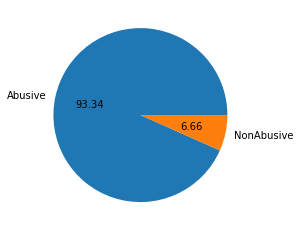

In [18]:
import matplotlib.pyplot as plt
plt.pie(data1['target'].value_counts(),labels=['Abusive','NonAbusive'],autopct="%0.2f")
plt.show()

In [19]:
#data is imbalance
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SaMMy
[nltk_data]     INaMdaR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data1['char_count']=data1['text'].apply(len)
data1.head()

,text,target,char_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [21]:
#num of words
data1['num_words']=data1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
data1.head()

,text,target,char_count,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [23]:
data1['num_sentences']=data1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data1.head()

,text,target,char_count,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [25]:
data1[['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.356789,12.570409
std,5394.644531,818.237457,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [26]:
#Abusive Words
data1[data1['target']==0][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.700365,16.955542
std,2834.633786,590.602208,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [27]:
#NonAbusive Words
data1[data1['target']==1][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.189580,12.257539
std,5532.160062,832.111557,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


#  Visualizations

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

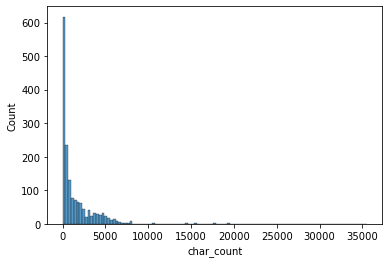

In [29]:
sns.histplot(data1[data1['target']==0]['char_count'])

<AxesSubplot:xlabel='char_count', ylabel='Count'>

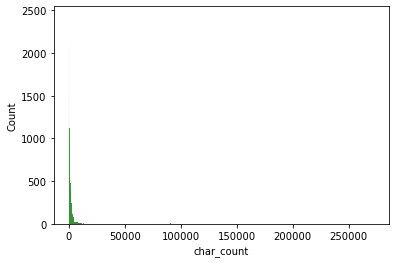

In [30]:
sns.histplot(data1[data1['target']==1]['char_count'],color='green')

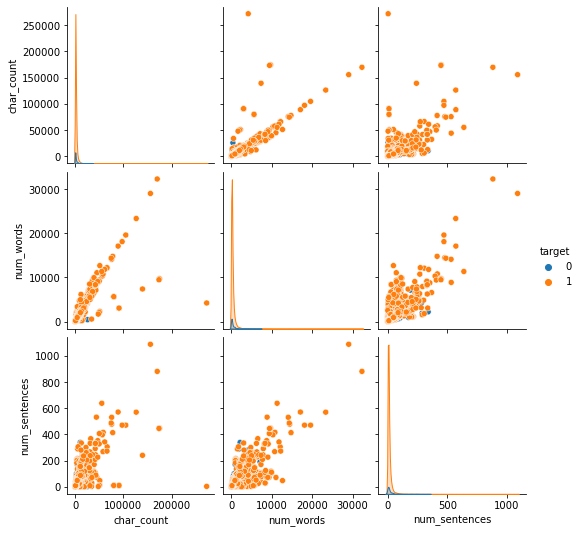

In [31]:
sns.pairplot(data1,hue='target')

<AxesSubplot:>

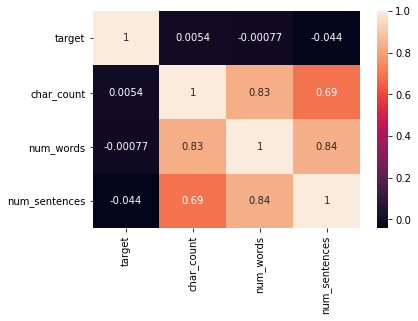

In [32]:
sns.heatmap(data1.corr(),annot=True)

# Data Preprocessing 

In [33]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()   #lower
    text=nltk.word_tokenize(text) #tokenize 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
           
    text=y[:]  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:   #Removing StopWords
            y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))   #Stemming
    
    return " ".join(y)

In [34]:
data1['transformed_text']=data1['text'].apply(transform_text)

In [35]:
data1.head()

,text,target,char_count,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [37]:
non_abusive_wc=wc.generate(data1[data1['target']==1]['transformed_text'].str.cat(sep=""))

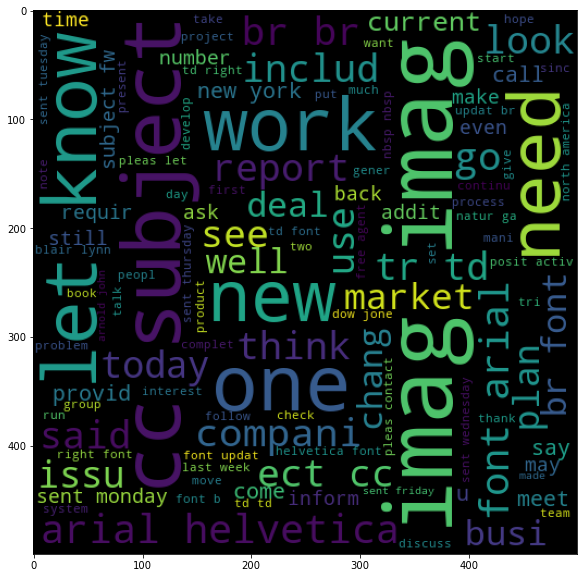

In [38]:
plt.figure(figsize=(20,10))
plt.imshow(non_abusive_wc)

In [39]:
abusive_wc=wc.generate(data1[data1['target']==0]['transformed_text'].str.cat(sep=""))

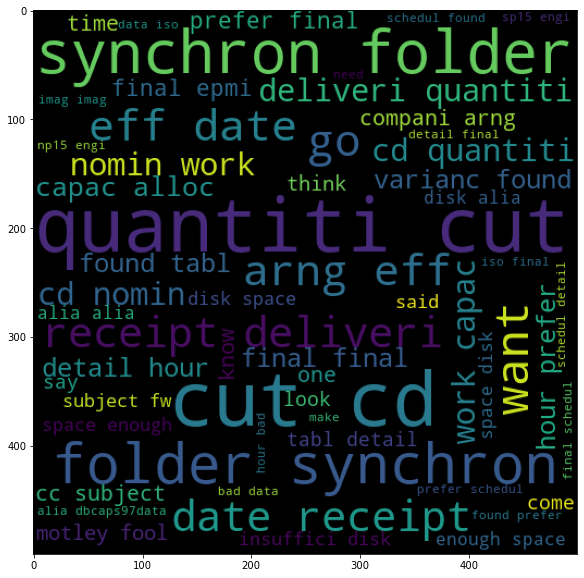

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(non_abusive_wc)

In [41]:
abusive_corpus=[]
for msg in data1[data1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        abusive_corpus.append(word)

In [42]:
len(abusive_corpus)

208413

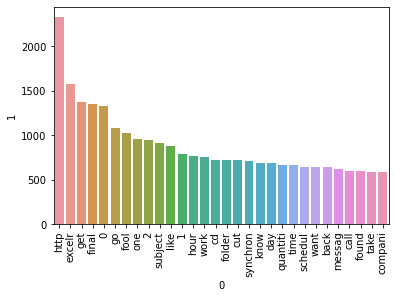

In [43]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(abusive_corpus).most_common(30))[0],pd.DataFrame(Counter(abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
non_abusive_corpus=[]
for msg in data1[data1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        non_abusive_corpus.append(word)

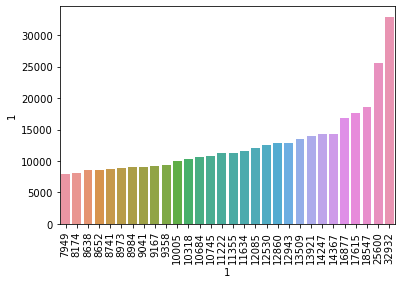

In [45]:
sns.barplot(pd.DataFrame(Counter(non_abusive_corpus).most_common(30))[1],pd.DataFrame(Counter(non_abusive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#  Model Building
# Doing for Imbalance Dataset 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [47]:
X=vectorizer.fit_transform(data1['transformed_text'])

In [48]:
X.shape

(24656, 10000)

In [49]:
y=data1['target'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#  Doing for Balancing by using SMOTE [Synthetic Minority Oversampling Technique]

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smt=SMOTE()
X_train1,y_train1=smt.fit_resample(X_train,y_train)
X_test1,y_test1=smt.fit_resample(X_test,y_test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [55]:
svc=SVC(kernel='sigmoid',gamma=2.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [56]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc
}

In [57]:
def train_classifier(clf,X_train1,y_train1,X_test1,y_test1):
    clf.fit(X_train1,y_train1)
    y_pred=clf.predict(X_test1)
    accuracy=accuracy_score(y_test1,y_pred)
    precision=precision_score(y_test1,y_pred)
    recall=recall_score(y_test1,y_pred)
    f1=f1_score(y_test1,y_pred)
    
    return accuracy,precision,recall,f1

In [58]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1=train_classifier(clf,X_train1,y_train1,X_test1,y_test1)
    
    print("For -",name)
    print("Accuracy -",current_accuracy)
    print("precision -",current_precision)
    print("recall -",current_recall)
    print("f1 -",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For - SVC
Accuracy - 0.9001521077792264
precision - 0.8905620360551432
recall - 0.9124293785310734
f1 - 0.9013630997102072
For - KN
Accuracy - 0.6848109517601043
precision - 0.9807801017524025
recall - 0.37700999565406346
f1 - 0.5446554700988855
For - NB
Accuracy - 0.9140591047370709
precision - 0.9118219148476334
recall - 0.9167753150803998
f1 - 0.9142919059486401
For - DT
Accuracy - 0.748587570621469
precision - 0.8343074225599065
recall - 0.6203824424163408
f1 - 0.711615154536391
For - LR
Accuracy - 0.9607779226423294
precision - 0.9608780699847859
recall - 0.9606692742285963
f1 - 0.9607736607627947
For - RF
Accuracy - 0.9006953498478922
precision - 0.838348623853211
recall - 0.9928292046936115
f1 - 0.9090728213290886


In [59]:
performance_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores,'recall':recall_scores,'f1':f1_scores}).sort_values('Accuracy',ascending='False')

In [60]:
performance_df1

,Algorithm,Accuracy,precision,recall,f1
1,KN,0.684811,0.980780,0.377010,0.544655
3,DT,0.748588,0.834307,0.620382,0.711615
0,SVC,0.900152,0.890562,0.912429,0.901363
5,RF,0.900695,0.838349,0.992829,0.909073
2,NB,0.914059,0.911822,0.916775,0.914292
4,LR,0.960778,0.960878,0.960669,0.960774


In [61]:
performance_df2=pd.melt(performance_df1,id_vars='Algorithm')

In [62]:
performance_df2

,Algorithm,variable,value
0,KN,Accuracy,0.684811
1,DT,Accuracy,0.748588
2,SVC,Accuracy,0.900152
3,RF,Accuracy,0.900695
4,NB,Accuracy,0.914059
5,LR,Accuracy,0.960778
6,KN,precision,0.980780
7,DT,precision,0.834307
8,SVC,precision,0.890562
9,RF,precision,0.838349


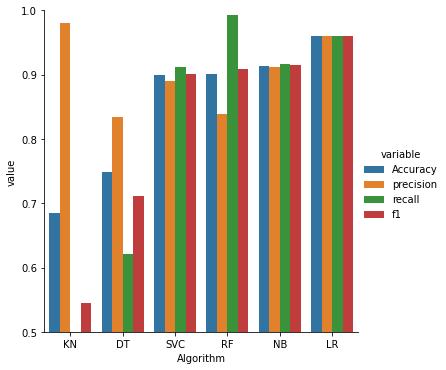

In [63]:
sns.catplot(x='Algorithm',y='value',
           hue='variable',data=performance_df2,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='horizontal')
plt.show()

In [64]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_10000':accuracy_scores,'precision_max_ft_10000':precision_scores,'recall_max_ft_10000':recall_scores,'f1_max_ft_10000':f1_scores}).sort_values('Accuracy_max_ft_10000',ascending='False')

In [65]:
performance_df1.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,precision,recall,f1,Accuracy_max_ft_10000,precision_max_ft_10000,recall_max_ft_10000,f1_max_ft_10000
0,KN,0.684811,0.980780,0.377010,0.544655,0.684811,0.980780,0.377010,0.544655
1,DT,0.748588,0.834307,0.620382,0.711615,0.748588,0.834307,0.620382,0.711615
2,SVC,0.900152,0.890562,0.912429,0.901363,0.900152,0.890562,0.912429,0.901363
3,RF,0.900695,0.838349,0.992829,0.909073,0.900695,0.838349,0.992829,0.909073
4,NB,0.914059,0.911822,0.916775,0.914292,0.914059,0.911822,0.916775,0.914292
5,LR,0.960778,0.960878,0.960669,0.960774,0.960778,0.960878,0.960669,0.960774


# logistic Regression giving the best result ,we can use it for deployment 

In [66]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
lrc.fit(X_train1,y_train1)
y_pred=lrc.predict(X_test1)
print(accuracy_score(y_test1,y_pred))
print(recall_score(y_test1,y_pred))
print(precision_score(y_test1,y_pred))
print(f1_score(y_test1,y_pred))

0.9609952194697957
0.9606692742285963
0.9612959338986736
0.9609825019019672
